In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Simulate 500 users
n_users = 500
user_data = {
    "UserID": np.arange(1001, 1001 + n_users),
    "Age": np.random.randint(18, 65, n_users),
    "Gender": np.random.choice(["Male", "Female"], n_users),
    "Location": np.random.choice(["Urban", "Suburban", "Rural"], n_users),
    "TotalSpend": np.round(np.random.normal(500, 150, n_users), 2),
    "TotalOrders": np.random.poisson(10, n_users),
    "BrowsingTime": np.round(np.random.normal(35, 10, n_users), 1),  # in minutes per day
    "Category_Electronics": np.random.randint(0, 2, n_users),
    "Category_Clothing": np.random.randint(0, 2, n_users),
    "Category_Home": np.random.randint(0, 2, n_users),
}

df = pd.DataFrame(user_data)

# Calculate Avg Order Value
df["AvgOrderValue"] = (df["TotalSpend"] / df["TotalOrders"]).replace([np.inf, -np.inf], 0)

df.head()


,UserID,Age,Gender,Location,TotalSpend,TotalOrders,BrowsingTime,Category_Electronics,Category_Clothing,Category_Home,AvgOrderValue
0,1001,56,Male,Urban,529.38,7,28.2,1,0,1,75.625714
1,1002,46,Male,Suburban,353.24,11,35.3,0,1,0,32.112727
2,1003,32,Male,Rural,561.24,12,24.1,1,0,0,46.770000
3,1004,60,Male,Suburban,244.61,9,24.1,1,1,0,27.178889
4,1005,25,Male,Rural,654.37,6,41.8,1,0,0,109.061667


In [3]:
# Check for missing/null values
print("Missing values:\n", df.isnull().sum())

# Basic data info
print("\nData Types:\n", df.dtypes)

# Remove rows with TotalOrders = 0 (to avoid divide by zero in AOV)
df = df[df["TotalOrders"] > 0].reset_index(drop=True)

# Final shape
print("\nFinal shape of dataset:", df.shape)

# Preview cleaned dataset
df.head()


Missing values:
 UserID                  0
Age                     0
Gender                  0
Location                0
TotalSpend              0
TotalOrders             0
BrowsingTime            0
Category_Electronics    0
Category_Clothing       0
Category_Home           0
AvgOrderValue           0
dtype: int64

Data Types:
 UserID                    int64
Age                       int64
Gender                   object
Location                 object
TotalSpend              float64
TotalOrders               int64
BrowsingTime            float64
Category_Electronics      int64
Category_Clothing         int64
Category_Home             int64
AvgOrderValue           float64
dtype: object

Final shape of dataset: (500, 11)


,UserID,Age,Gender,Location,TotalSpend,TotalOrders,BrowsingTime,Category_Electronics,Category_Clothing,Category_Home,AvgOrderValue
0,1001,56,Male,Urban,529.38,7,28.2,1,0,1,75.625714
1,1002,46,Male,Suburban,353.24,11,35.3,0,1,0,32.112727
2,1003,32,Male,Rural,561.24,12,24.1,1,0,0,46.770000
3,1004,60,Male,Suburban,244.61,9,24.1,1,1,0,27.178889
4,1005,25,Male,Rural,654.37,6,41.8,1,0,0,109.061667


In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode Gender and Location
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])  # Male: 1, Female: 0
df["Location"] = le.fit_transform(df["Location"])  # Urban/Suburban/Rural as 0/1/2

df.head()


,UserID,Age,Gender,Location,TotalSpend,TotalOrders,BrowsingTime,Category_Electronics,Category_Clothing,Category_Home,AvgOrderValue
0,1001,56,1,2,529.38,7,28.2,1,0,1,75.625714
1,1002,46,1,1,353.24,11,35.3,0,1,0,32.112727
2,1003,32,1,0,561.24,12,24.1,1,0,0,46.770000
3,1004,60,1,1,244.61,9,24.1,1,1,0,27.178889
4,1005,25,1,0,654.37,6,41.8,1,0,0,109.061667


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plots for Colab/Notebook
%matplotlib inline

# Set Seaborn style
sns.set(style="whitegrid")


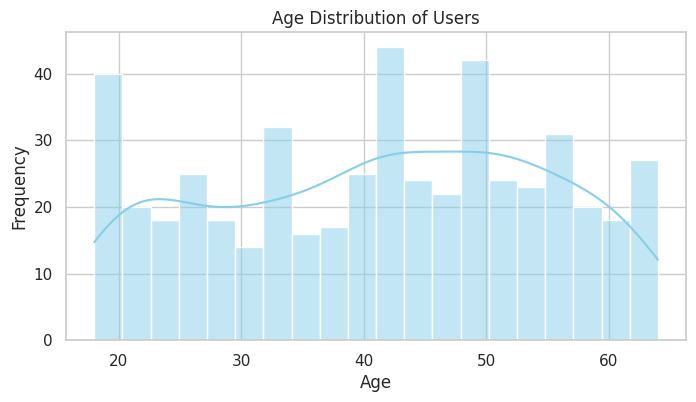

In [6]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


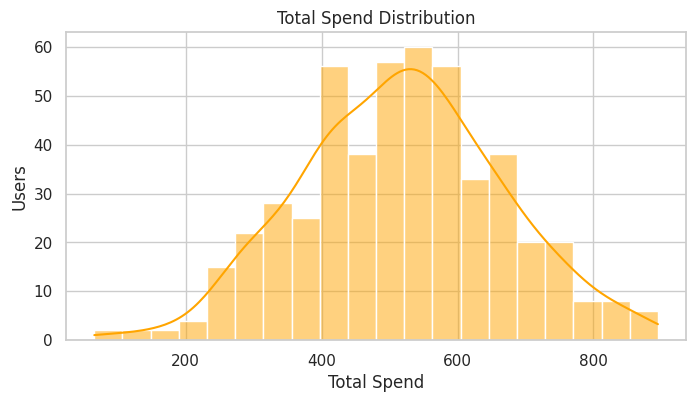

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(df["TotalSpend"], bins=20, kde=True, color="orange")
plt.title("Total Spend Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Users")
plt.show()


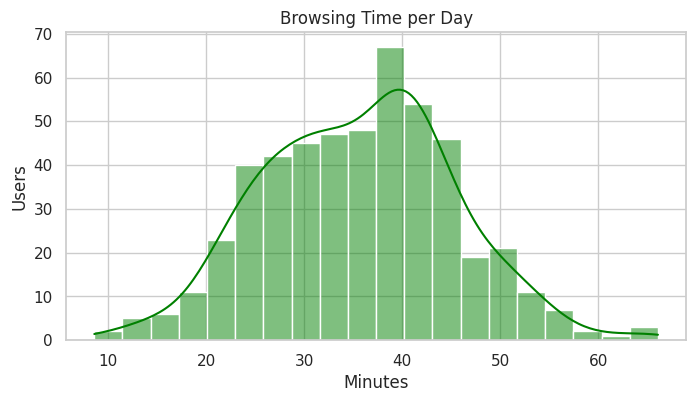

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(df["BrowsingTime"], bins=20, kde=True, color="green")
plt.title("Browsing Time per Day")
plt.xlabel("Minutes")
plt.ylabel("Users")
plt.show()


/tmp/ipython-input-9-625567465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="TotalSpend", data=df, palette="Set2")


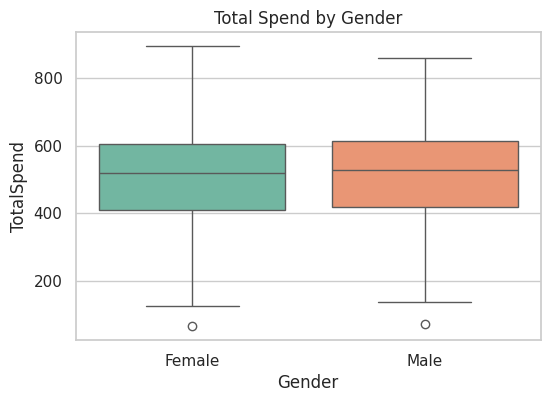

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Gender", y="TotalSpend", data=df, palette="Set2")
plt.xticks([0, 1], ['Female', 'Male'])
plt.title("Total Spend by Gender")
plt.show()


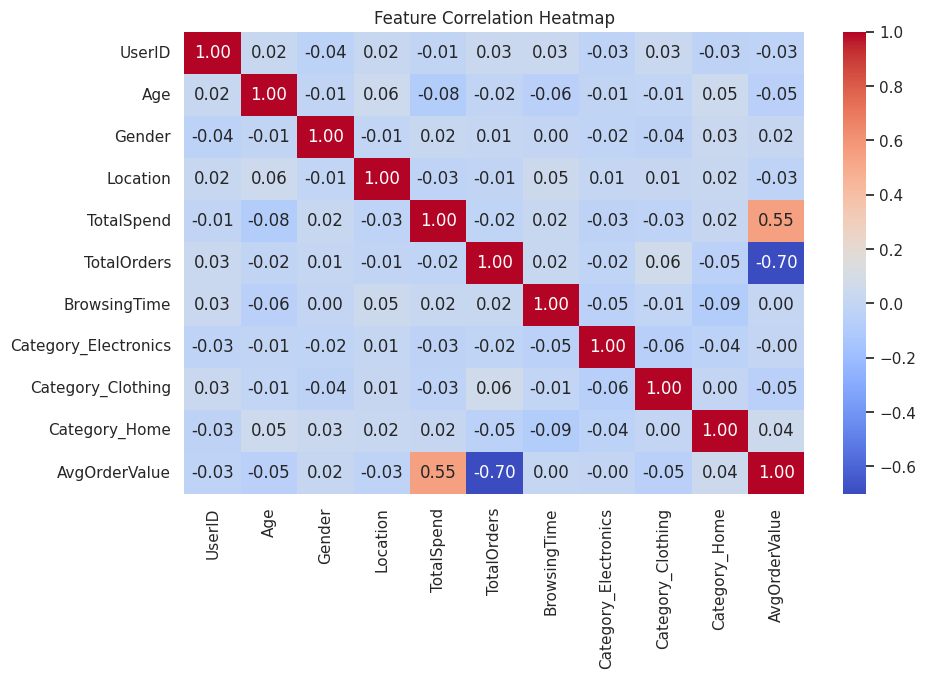

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


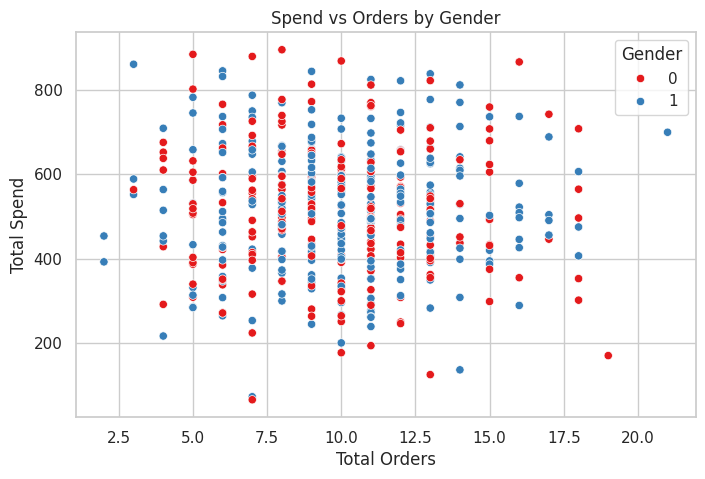

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="TotalOrders", y="TotalSpend", data=df, hue="Gender", palette="Set1")
plt.title("Spend vs Orders by Gender")
plt.xlabel("Total Orders")
plt.ylabel("Total Spend")
plt.show()


In [12]:
# Select features for clustering
features = [
    "Age", "Gender", "Location", "TotalSpend", "TotalOrders",
    "AvgOrderValue", "BrowsingTime",
    "Category_Electronics", "Category_Clothing", "Category_Home"
]

X = df[features].copy()
X.head()


,Age,Gender,Location,TotalSpend,TotalOrders,AvgOrderValue,BrowsingTime,Category_Electronics,Category_Clothing,Category_Home
0,56,1,2,529.38,7,75.625714,28.2,1,0,1
1,46,1,1,353.24,11,32.112727,35.3,0,1,0
2,32,1,0,561.24,12,46.770000,24.1,1,0,0
3,60,1,1,244.61,9,27.178889,24.1,1,1,0
4,25,1,0,654.37,6,109.061667,41.8,1,0,0


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df.head()


,Age,Gender,Location,TotalSpend,TotalOrders,AvgOrderValue,BrowsingTime,Category_Electronics,Category_Clothing,Category_Home
0,1.100655,0.919249,1.262972,0.079493,-0.908678,0.489908,-0.767750,0.945484,-0.992032,0.960769
1,0.353029,0.919249,0.036786,-1.112257,0.330992,-0.838084,-0.031762,-1.057660,1.008032,-1.040833
2,-0.693647,0.919249,-1.189401,0.295056,0.640909,-0.390753,-1.192757,0.945484,-0.992032,-1.040833
3,1.399705,0.919249,0.036786,-1.847240,-0.288843,-0.988662,-1.192757,0.945484,1.008032,-1.040833
4,-1.216985,0.919249,-1.189401,0.925167,-1.218595,1.510355,0.642030,0.945484,-0.992032,-1.040833


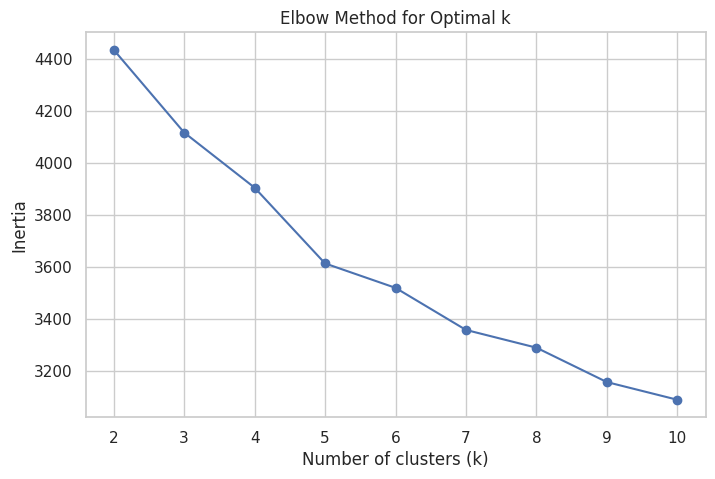

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method to find optimal k
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [15]:
# Fit KMeans with chosen k
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled_df)

# Add cluster labels to original data
df["Cluster"] = kmeans.labels_
df["Cluster"].value_counts()


,count
Cluster,
0,157
2,138
1,138
3,67


In [16]:
score = silhouette_score(X_scaled_df, kmeans.labels_)
print(f"Silhouette Score for k=4: {score:.2f}")


Silhouette Score for k=4: 0.09


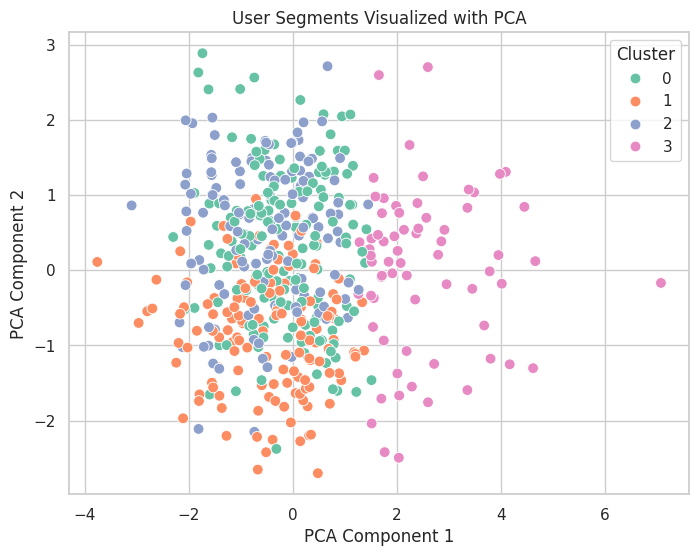

In [17]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="Set2", s=60)
plt.title("User Segments Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [18]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=5)  # tune eps
dbscan.fit(X_scaled_df)

df["DBSCAN_Cluster"] = dbscan.labels_

# Count clusters (-1 means noise)
df["DBSCAN_Cluster"].value_counts()


,count
DBSCAN_Cluster,
-1,135
2,38
6,33
0,31
8,29
5,26
12,26
4,25
1,25


In [19]:
# Group by KMeans cluster and view means
cluster_summary = df.groupby("Cluster")[[
    "Age", "Gender", "Location", "TotalSpend", "TotalOrders",
    "AvgOrderValue", "BrowsingTime",
    "Category_Electronics", "Category_Clothing", "Category_Home"
]].mean().round(2)

cluster_summary


,Age,Gender,Location,TotalSpend,TotalOrders,AvgOrderValue,BrowsingTime,Category_Electronics,Category_Clothing,Category_Home
Cluster,,,,,,,,,,
0,41.63,0.76,0.74,516.39,10.45,51.76,33.16,0.85,0.17,0.68
1,32.85,0.18,0.92,517.79,11.34,48.90,37.02,0.45,0.62,0.25
2,49.21,0.68,1.29,447.37,9.96,47.89,36.40,0.25,0.76,0.59
3,41.48,0.49,0.96,664.93,5.76,123.93,36.80,0.49,0.46,0.57


In [20]:
# Example: manually create a dictionary of labels
# (You’ll change these based on YOUR interpretation of cluster_summary)
cluster_labels = {
    0: "High Spenders",
    1: "Frequent Shoppers",
    2: "Low Activity Users",
    3: "Browsers"
}

# Map labels
df["ClusterLabel"] = df["Cluster"].map(cluster_labels)

# Preview final labeled dataset
df[["UserID", "Cluster", "ClusterLabel"]].head()


,UserID,Cluster,ClusterLabel
0,1001,0,High Spenders
1,1002,2,Low Activity Users
2,1003,0,High Spenders
3,1004,2,Low Activity Users
4,1005,3,Browsers


In [21]:
df["ClusterLabel"].value_counts()


,count
ClusterLabel,
High Spenders,157
Low Activity Users,138
Frequent Shoppers,138
Browsers,67


/tmp/ipython-input-22-945916968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="ClusterLabel", y="TotalSpend", palette="pastel")


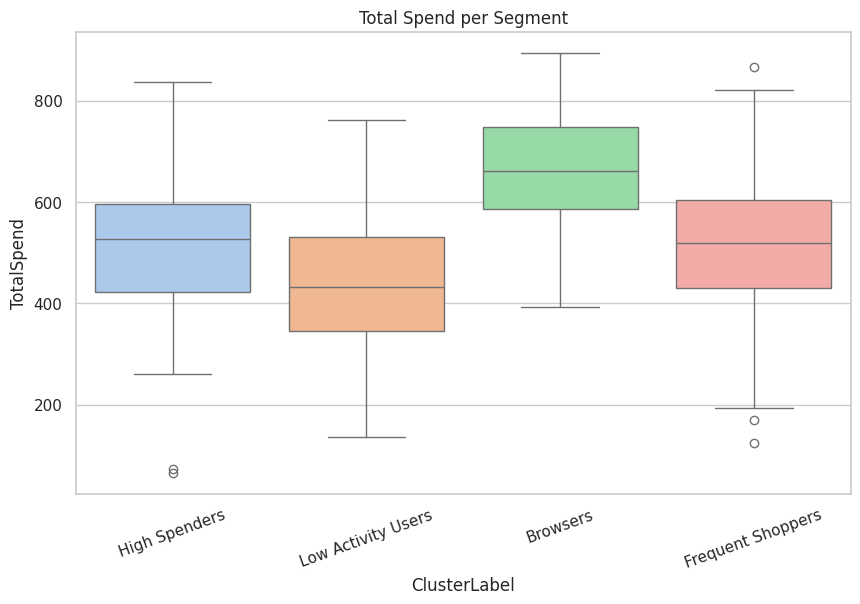

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="ClusterLabel", y="TotalSpend", palette="pastel")
plt.title("Total Spend per Segment")
plt.xticks(rotation=20)
plt.show()


📊 Amazon User Segmentation – Summary
Objective:
Segment Amazon users using unsupervised learning (KMeans and DBSCAN) to discover behavioral patterns and enable personalized marketing.

Steps Taken:

Data Simulation:
Simulated 500 user profiles with demographics, behavior, and category preferences.

Preprocessing:
Cleaned data, handled missing values, encoded categorical features, and standardized inputs.

EDA:
Visualized user distributions, correlations, and relationships between behavior and spend.

Feature Engineering:
Used features like Total Spend, Avg Order Value, and Browsing Time for modeling.

Clustering:

Applied KMeans with optimal k=4 (based on elbow method).

Evaluated clusters using Silhouette Score.

Visualized clusters using PCA.

Interpretation:
Labeled clusters as:

High Spenders

Frequent Shoppers

Low Activity Users

Browsers

Outcome:
The project demonstrated how user segmentation can help personalize user experiences, increase retention, and guide data-driven marketing strategies.



In [23]:
# Save final labeled data to CSV
df.to_csv("amazon_user_segments.csv", index=False)


In [24]:
from google.colab import files
files.download("amazon_user_segments.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>